In [31]:
import pandas as pd
import matplotlib as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import absolute
from sklearn.metrics import mean_squared_error

In [32]:
df = pd.read_csv('seattle-weather.csv')

In [33]:
df.head(6)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain


In [34]:
print(df['weather'].unique())

['drizzle' 'rain' 'sun' 'snow' 'fog']


In [35]:
df['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [36]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['weather'])
print(one_hot_encoded_data)

            date  precipitation  temp_max  temp_min  wind  weather_drizzle  \
0     2012-01-01            0.0      12.8       5.0   4.7                1   
1     2012-01-02           10.9      10.6       2.8   4.5                0   
2     2012-01-03            0.8      11.7       7.2   2.3                0   
3     2012-01-04           20.3      12.2       5.6   4.7                0   
4     2012-01-05            1.3       8.9       2.8   6.1                0   
...          ...            ...       ...       ...   ...              ...   
1456  2015-12-27            8.6       4.4       1.7   2.9                0   
1457  2015-12-28            1.5       5.0       1.7   1.3                0   
1458  2015-12-29            0.0       7.2       0.6   2.6                0   
1459  2015-12-30            0.0       5.6      -1.0   3.4                0   
1460  2015-12-31            0.0       5.6      -2.1   3.5                0   

      weather_fog  weather_rain  weather_snow  weather_sun  
0 

In [37]:
one_hot_encoded_data.head(5)

,date,precipitation,temp_max,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,2012-01-01,0.0,12.8,5.0,4.7,1,0,0,0,0
1,2012-01-02,10.9,10.6,2.8,4.5,0,0,1,0,0
2,2012-01-03,0.8,11.7,7.2,2.3,0,0,1,0,0
3,2012-01-04,20.3,12.2,5.6,4.7,0,0,1,0,0
4,2012-01-05,1.3,8.9,2.8,6.1,0,0,1,0,0


In [38]:
#x = df[['precipitation','temp_max','temp_min','wind','weather_drizzle','weather_fog','weather_snow','weather_sun']]

In [39]:
df = one_hot_encoded_data

In [40]:
df.head(5)

,date,precipitation,temp_max,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
0,2012-01-01,0.0,12.8,5.0,4.7,1,0,0,0,0
1,2012-01-02,10.9,10.6,2.8,4.5,0,0,1,0,0
2,2012-01-03,0.8,11.7,7.2,2.3,0,0,1,0,0
3,2012-01-04,20.3,12.2,5.6,4.7,0,0,1,0,0
4,2012-01-05,1.3,8.9,2.8,6.1,0,0,1,0,0


In [41]:
x = df[['precipitation','temp_max','temp_min','wind','weather_drizzle','weather_fog','weather_snow','weather_sun']]

In [42]:
y = df['weather_rain']

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, train_size = .80) #train test split

In [45]:
from sklearn.linear_model import LinearRegression

In [46]:
#define cross-validation method to use number of splits is 10
cv = KFold(n_splits=11, random_state=1, shuffle=True)

In [47]:
model = LinearRegression()

In [48]:
model.fit(x,y)

LinearRegression()

In [49]:
#use k-fold CV to evaluate model
scores = cross_val_score(model, x, y, scoring='neg_mean_absolute_error',cv=cv, n_jobs=-1)
#view mean absolute error
mean(absolute(scores))

7.631958313436532e-16

In [50]:
# model evaluation for training set
y_train_predict = model.predict(x_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
#r2 = r2_score(y_train, y_train_predict)

In [51]:
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for training set
--------------------------------------
RMSE is 6.653095091343113e-16


In [52]:
y_test_predict = model.predict(x_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

In [53]:
print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))

The model performance for testing set
--------------------------------------
RMSE is 6.611577484792278e-16


In [54]:
model.score(x,y)*100

100.0

In [55]:
df.describe()

,precipitation,temp_max,temp_min,wind,weather_drizzle,weather_fog,weather_rain,weather_snow,weather_sun
count,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136,0.036277,0.069131,0.438741,0.017796,0.438056
std,6.680194,7.349758,5.023004,1.437825,0.187041,0.253763,0.496403,0.132255,0.496318
min,0.000000,-1.600000,-7.100000,0.400000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.600000,4.400000,2.200000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,15.600000,8.300000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.800000,22.200000,12.200000,4.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,55.900000,35.600000,18.300000,9.500000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
from sklearn.metrics import r2_score
y_pred = model.predict(x_test)


In [57]:
print(r2_score(y_test, y_pred))

1.0


In [58]:
df['weather_rain'].value_counts()

0    820
1    641
Name: weather_rain, dtype: int64

<AxesSubplot:>

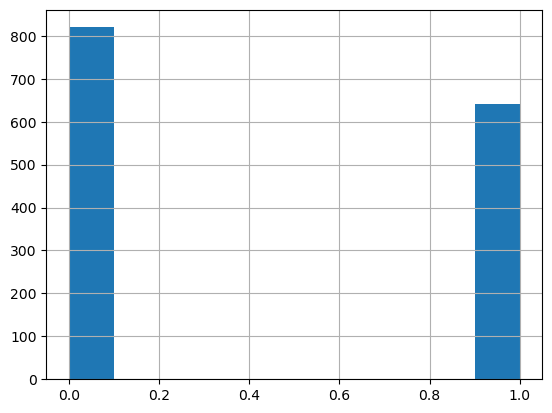

In [59]:
df['weather_rain'].hist()